In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import operator

In [4]:
df = pd.read_csv('/Users/vandanaanand/Documents/GitHub/Final-Project/Data/report.csv')

In [5]:
df.head() #loading data

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10


In [6]:
df.columns #viewing columns only

Index(['report_year', 'agency_code', 'agency_jurisdiction', 'population',
       'violent_crimes', 'homicides', 'rapes', 'assaults', 'robberies',
       'months_reported', 'crimes_percapita', 'homicides_percapita',
       'rapes_percapita', 'assaults_percapita', 'robberies_percapita'],
      dtype='object')

In [ ]:
#Data Visulization 

In [7]:
df_total_US = df[df.agency_jurisdiction == 'United States']
df_no_total_US=df[df.agency_jurisdiction != 'United States']

In [ ]:
#Total number of violent crimes in USA

/Users/vandanaanand/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Total number of crimes'), Text(0, 0.5, 'City')]

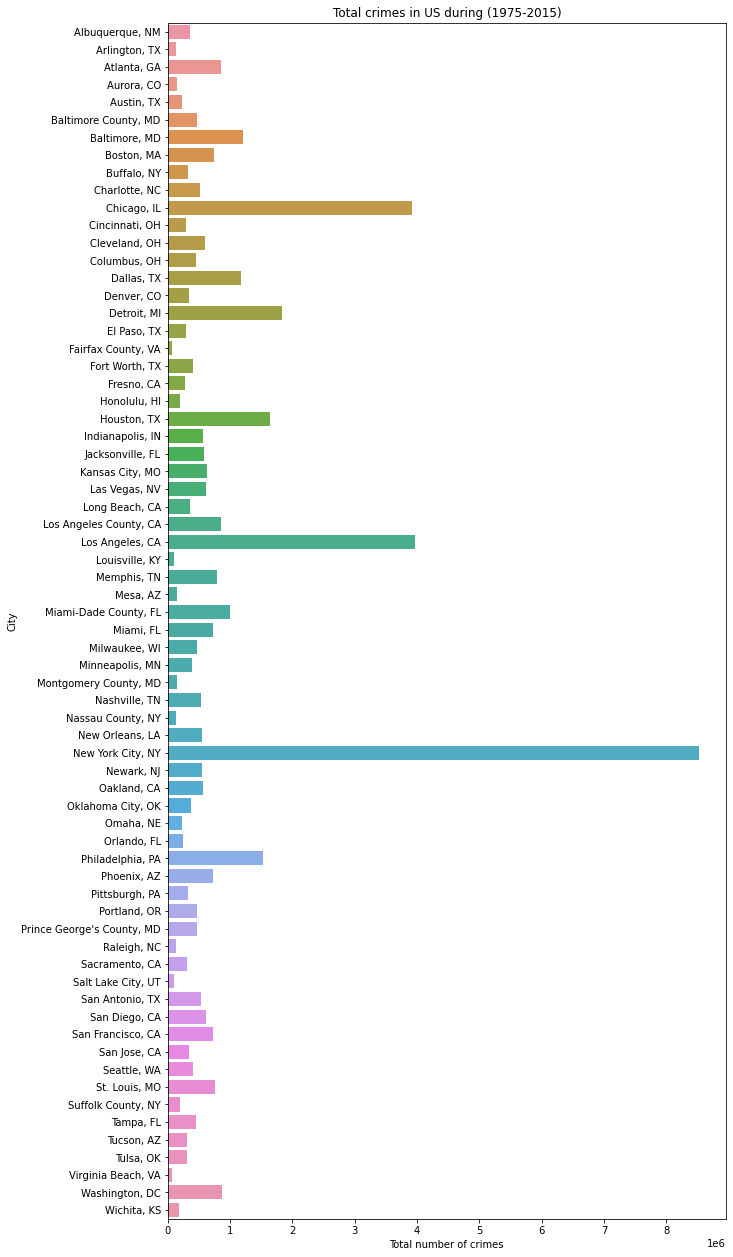

In [8]:
ax=plt.figure(figsize=(10,22))
ax = sns.barplot(df_no_total_US["violent_crimes"]+df_no_total_US["homicides"]+
                 df_no_total_US["rapes"]+df_no_total_US["assaults"]+df_no_total_US["robberies"],                 
                 y=df_no_total_US["agency_jurisdiction"],estimator=sum ,ci=0)
ax.set_title('Total crimes in US during (1975-2015)')
ax.set(xlabel='Total number of crimes', ylabel='City')

In [15]:
%pip install plotly==5.9.0

     |████████████████████████████████| 15.2 MB 4.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [16]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [17]:
a = set(df_no_total_US["agency_jurisdiction"])
a = list(a)

In [18]:
doubles = dict()
for i in range(0,len(a)):
    doubles[i] = df_no_total_US[df_no_total_US['agency_jurisdiction'].str.contains(a[i])]

In [19]:
trace = dict()
for i in range(0,len(a)):
    trace[i] = go.Scatter(x = doubles[i]['report_year'],y=doubles[i]['violent_crimes'],name = a[i],opacity = 0.8)

In [20]:
data = [trace[0],trace[1],trace[2],trace[3],trace[4],trace[5],trace[6],trace[7],trace[8],trace[9],
        trace[10],trace[11],trace[12],trace[13],trace[14],trace[15],trace[16],trace[17],trace[18],trace[19],
         trace[20],trace[21],trace[22],trace[23],trace[24],trace[25],trace[26],trace[27],trace[28],trace[29],
          trace[30],trace[31],trace[32],trace[33],trace[34],trace[35],trace[36],trace[37],trace[38],trace[39],
           trace[40],trace[41],trace[42],trace[43],trace[44],trace[45],trace[46],trace[47],trace[48],trace[49],
            trace[50],trace[51],trace[52],trace[53],trace[54],trace[55],trace[56],trace[57],trace[58],trace[59],
             trace[60],trace[61],trace[62],trace[63],trace[64],trace[65],trace[66],trace[67]]

In [21]:
layout = dict(title = "Total Crimes in US during (1975-2015)",
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Total Crimes'),)

In [23]:
fig = dict(data=data, layout=layout)

In [24]:
py.iplot(fig)

In [25]:
df_no_total_US.fillna(value=0)
violent_crimes=df_no_total_US["violent_crimes"]
total_number_of_crimes=np.nansum(violent_crimes)
print("Total number of crimes between 1975-2015 in US is:",total_number_of_crimes)
max_index, max_crimes_jur= max(enumerate(df_no_total_US["violent_crimes"]), key=operator.itemgetter(1))
max_crimes_jura=df_no_total_US.iloc[max_index] ["agency_jurisdiction"]

NYC = df_no_total_US[df_no_total_US.agency_jurisdiction == 'New York City, NY']
total_nyc=NYC['violent_crimes'].sum()
precent=total_nyc/total_number_of_crimes*100
print("The jurisdiction with the most crimes is:",max_crimes_jura, "and total number of crimes:",total_nyc, "that is %0.2f"% precent,"% of total crimes in USA between 1975-2015.")

Total number of crimes between 1975-2015 in US is: 24629376.0
The jurisdiction with the most crimes is: New York City, NY and total number of crimes: 4263284.0 that is 17.31 % of total crimes in USA between 1975-2015.


In [ ]:
#Looking deeper into the crimes in NYC…

/Users/vandanaanand/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/vandanaanand/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/vandanaanand/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/van

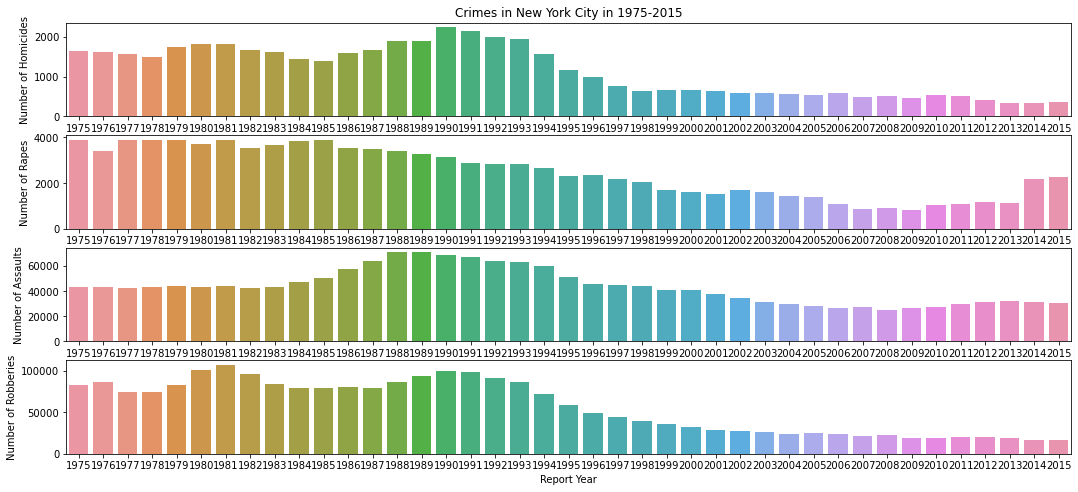

In [26]:
plt.figure(figsize=(18,10))

ax1 = plt.subplot(511)
sns.barplot(NYC["report_year"], NYC["homicides"])
plt.ylabel("Number of Homicides")

ax2 = plt.subplot(512, sharex=ax1)
sns.barplot(NYC["report_year"], NYC["rapes"])
plt.ylabel("Number of Rapes")

ax3 = plt.subplot(513, sharex=ax1)
sns.barplot(NYC["report_year"], NYC["assaults"])
plt.ylabel("Number of Assaults")

ax4 = plt.subplot(514, sharex=ax1)
sns.barplot(NYC["report_year"], NYC["robberies"])
plt.ylabel("Number of Robberies")

ax1.set_title('Crimes in New York City in 1975-2015')
plt.xlabel("Report Year")
plt.show()

In [27]:
max_index, max_crimes = max(enumerate(NYC["violent_crimes"]), key=operator.itemgetter(1))
max_crimes_year=NYC.iloc[max_index] ["report_year"]
print("The higest number of crimes was",max_crimes,"in",max_crimes_year)

The higest number of crimes was 174542.0 in 1990


In [ ]:
#Crime rates in NYC

/Users/vandanaanand/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



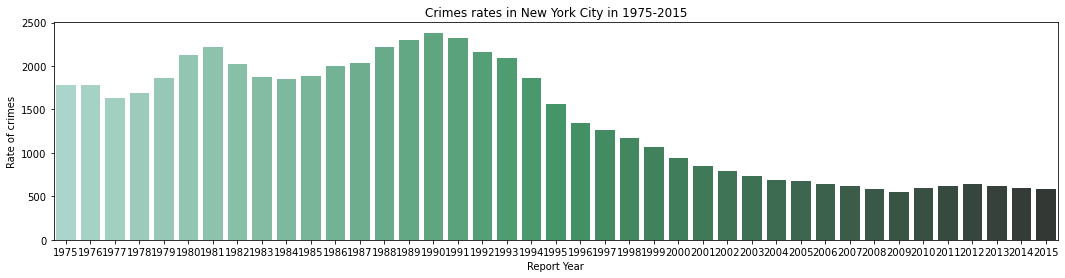

In [28]:
plt.figure(figsize=(18,4))
sns.barplot(NYC["report_year"], NYC["crimes_percapita"], palette="BuGn_d",)
plt.ylabel("Rate of crimes")
plt.title('Crimes rates in New York City in 1975-2015')
plt.xlabel("Report Year")
plt.show()

In [ ]:
#Why crimes in NYC reduced at the 90's? Is it related to the mayor of NYC?

#Republican-red

#Democratic-blue

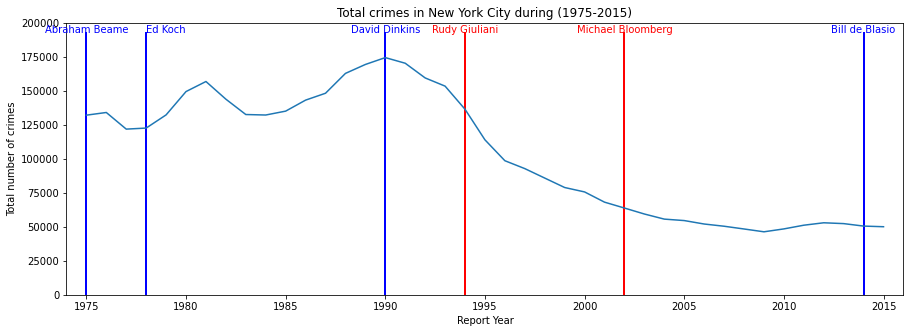

In [29]:
ax=plt.figure(5,figsize=(15,5))
ax = plt.plot([1975, 1975], [0, 193000], 'b-', lw=2)
ax = plt.text(1975, 193000, 'Abraham Beame',color='blue',horizontalalignment='center')

ax = plt.plot([1978, 1978], [0, 193000], 'b-', lw=2)
ax = plt.text(1978, 193000, 'Ed Koch',color='blue',horizontalalignment='left')

ax = plt.plot([1990, 1990], [0, 193000], 'b-', lw=2)
ax = plt.text(1990, 193000, 'David Dinkins',color='blue',horizontalalignment='center')

ax = plt.plot([1994, 1994], [0, 193000], 'r-', lw=2)
ax = plt.text(1994, 193000, 'Rudy Giuliani',color='red',horizontalalignment='center')

ax = plt.plot([2002, 2002], [0, 193000], 'r-', lw=2)
ax = plt.text(2002, 193000, 'Michael Bloomberg',color='red',horizontalalignment='center')

ax = plt.plot([2014, 2014], [0, 193000], 'b-', lw=2)
ax = plt.text(2014, 193000, 'Bill de Blasio',color='blue',horizontalalignment='center')

ax = plt.plot(NYC["report_year"],NYC["violent_crimes"])
plt.title('Total crimes in New York City during (1975-2015)')
plt.xlabel("Report Year")
plt.ylabel("Total number of crimes")
plt.ylim([0,200000])
plt.xlim([1974,2016])
plt.show()

In [ ]:
#Total crimes in USA

/Users/vandanaanand/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



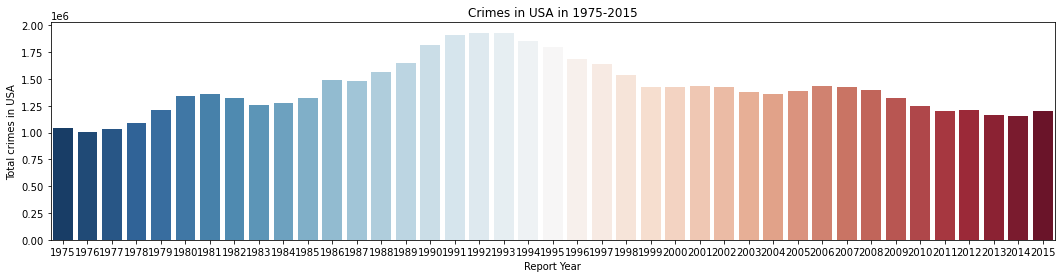

In [30]:
plt.figure(figsize=(18,4))
sns.barplot(df_total_US["report_year"], df_total_US["violent_crimes"], palette="RdBu_r",)
plt.ylabel("Total crimes in USA")
plt.title('Crimes in USA in 1975-2015')
plt.xlabel("Report Year")
plt.show()

In [ ]:
#Conclusion

In [ ]:
#As seen in the barplot above, New York City is the city with the most crimes in the US. 
#During the 90's there is a striking reduction in crimes in new York city. Most of these crimes are robberies. 
#In the 90's in New York City, the 'zero tolerance'(-aggressive enforcement of minor offences), has begun its effect and resulted a huge reduction in the number of crimes. 
#This effected the total amount of crimes in US.

